In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import glob
import subprocess
import math

In [2]:
all_files = glob.glob('EVCS_15_E*.db')

In [3]:
#Extract result data from all result databases and create dataframes for each variable

grid_p = pd.DataFrame()
grid_ex_p = pd.DataFrame()
grid_tot_p = pd.DataFrame()

soc_pen = pd.DataFrame()

grid_e = pd.DataFrame()
grid_ex_e = pd.DataFrame()

ESS_lvl = pd.DataFrame()
ESS_p = pd.DataFrame()

sclrs = pd.DataFrame()

for filename in glob.glob('EVCS_15_E*.db'):
    con = sqlite3.connect(filename)
    
    grid_power = pd.read_sql_query("SELECT * FROM var_grid_power", con)
    grid_extra_power = pd.read_sql_query("SELECT * FROM var_grid_ex_power", con)
    grid_total_power = pd.read_sql_query("SELECT * FROM var_grid_total_power", con)
    
    grid_energy = pd.read_sql_query("SELECT * FROM var_grid_energy", con)
    grid_extra_energy = pd.read_sql_query("SELECT * FROM var_grid_ex_energy", con)
    
    ESS_level = pd.read_sql_query('SELECT * FROM var_ESS_level', con)
    ESS_power = pd.read_sql_query('SELECT * FROM var_ESS_power', con)
    
    scalars =  pd.read_sql_query('SELECT * FROM scalarvariables', con)
    
    soc_penalty = pd.read_sql_query('SELECT * FROM var_SOC_pen', con)
    
    con.close()
    
    grid_p[filename[10:-11]] = grid_power['level'].copy()
    grid_ex_p[filename[10:-11]] = grid_extra_power['level'].copy()
    grid_tot_p[filename[10:-11]] = grid_total_power['level'].copy()
    
    grid_e[filename[10:-11]] = grid_energy['level'].copy()
    grid_ex_e[filename[10:-11]] = grid_extra_energy['level'].copy() 
    
    ESS_lvl[filename[10:-11]] = ESS_level['level'].copy()
    ESS_p[filename[10:-11]] = ESS_power['level'].copy()  
    
    sclrs[filename[10:-11]] = scalars['level'].copy()
    
    soc_pen[filename[10:-11]] = soc_penalty['level'].copy()


In [9]:
ESS_p

,OG
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
34537,0.0
34538,0.0
34539,0.0
34540,0.0


In [4]:
battery_1 = ESS_p['OG']

In [5]:
discharge_1 = []
charge_1 = []
discharge_2 = []
charge_2 = []

for i in range(len(battery_1)):
    if battery_1[i] < 0:
        charge_1.append(battery_1[i])
    elif battery_1[i] > 0:
        discharge_1.append(battery_1[i])
        
        
        

In [6]:
discharge_1.sort(reverse = True)

Text(0.5, 0, 'ESS Discharge Power [kW]')

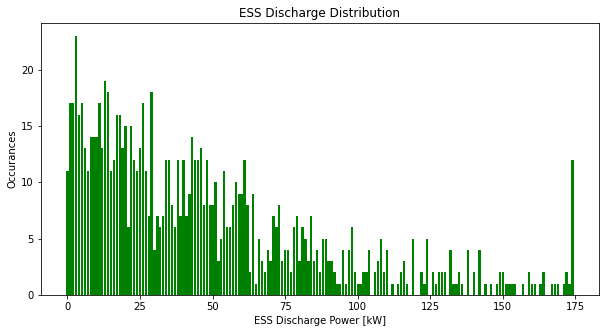

In [9]:
a = [round(num,0) for num in discharge_1]
from collections import Counter
aa = Counter(a)
aa = dict(aa)
names = list(aa.keys())
times = list(aa.values())

plt.figure(figsize = (10,5))
plt.bar(names, times, color = 'g')
plt.title('ESS Discharge Distribution')
plt.ylabel('Occurances')
plt.xlabel('ESS Discharge Power [kW]')

In [23]:
from scipy import stats

mean = np.mean(a)
median = np.median(a)
mode = stats.mode(a)

print('mode =', mode, 'median =', median, 'mean =', mean)




mode = ModeResult(mode=array([3.]), count=array([23])) median = 38.0 mean = 47.24514811031665


Text(0.5, 0, 'ESS Discharge Power [kW]')

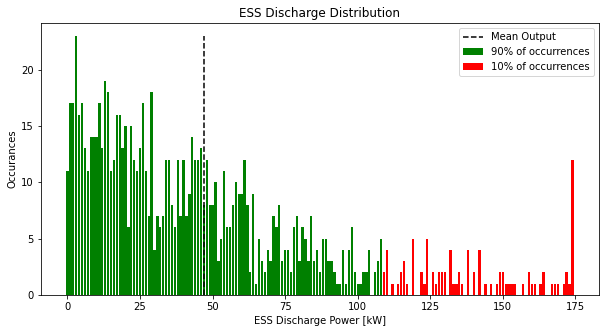

In [43]:
#Differ 10% 
avg = [47,47]
ave = [0,23]

plt.figure(figsize = (10,5))
plt.bar(names[46:],times[46:], color = 'g', label = '90% of occurrences')
plt.bar(names[0:46],times[0:46],color = 'r', label = '10% of occurrences')
plt.plot(avg,ave, '--',color = 'black', label = 'Mean Output')
plt.legend()

plt.title('ESS Discharge Distribution')
plt.ylabel('Occurances')
plt.xlabel('ESS Discharge Power [kW]')

5

Text(0.5, 0, 'ESS Discharge Power [kW]')

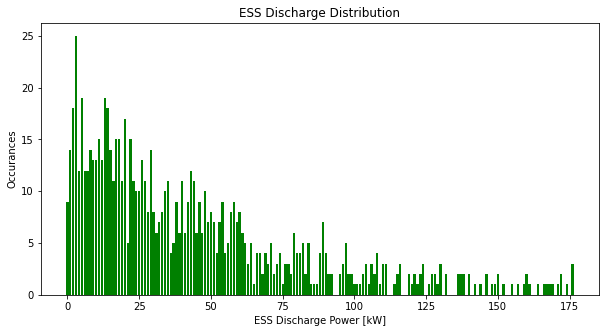

In [69]:
b = [round(num,0) for num in discharge_2]
from collections import Counter
bb = Counter(b)
bb = dict(bb)
names = list(bb.keys())
times = list(bb.values())

plt.figure(figsize = (10,5))
plt.bar(names, times, color = 'g')
plt.title('ESS Discharge Distribution')
plt.ylabel('Occurances')
plt.xlabel('ESS Discharge Power [kW]')